In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree, metrics
from sklearn.tree import export_graphviz
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from os import system as sys

In [2]:
fuji = pd.read_csv("fuji_full_fp_sample.csv")
fuji = fuji.sample(frac=1).reset_index(drop=True)
fuji

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,circ_radius,pos_angle,tmass,flag,z_2,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy
0,242.603330,53.545840,39633301241072147,3447,10147,sv3,bright,39633301241072147,0.085035,0.000010,...,1.626211,70.341650,2MASXJ16102481+5332448,1,0.0850,16.921,0.566,2.327,0.100,0.103
1,134.018314,32.468341,39632929860617550,1127,5065,sv1,bright,39632929860617550,0.075974,0.000010,...,1.706502,11.880075,2MASXJ08560439+3228059,1,0.0760,16.298,0.658,2.229,0.239,0.056
2,185.529318,55.819114,39633332270532485,2690,11186,sv2,bright,39633332270532485,0.036741,0.000005,...,6.517449,-25.077124,2MASXJ12220705+5549084,1,0.0367,13.780,0.766,1.085,0.082,0.142
3,171.525305,50.863969,39633259574855596,2636,5957,sv2,bright,39633259574855596,0.110230,0.000031,...,1.410348,-52.917430,2MASSJ11260609+5051502,0,0.1102,16.722,0.775,1.560,-9.999,0.134
4,242.749805,55.962433,39633336208985186,3248,11524,sv3,bright,39633336208985186,0.063570,0.000049,...,2.549533,-27.487060,2MASSJ16105992+5557450,1,0.0636,17.572,0.737,1.821,-9.999,0.169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,203.778511,2.064969,39627836465611376,742,26372,sv1,bright,39627836465611376,0.111816,0.000013,...,1.190621,-39.305637,2MASXJ13350687+0203536,1,0.1118,16.497,0.807,1.031,0.512,0.061
6694,211.666308,-0.357299,39627782237457647,3205,26006,sv3,bright,39627782237457647,0.112972,0.000037,...,5.786677,-82.654580,2MASXJ14063992-0021263,0,0.1130,16.287,0.672,2.677,0.116,0.600
6695,176.917176,54.716892,39633318353833096,2630,5980,sv2,bright,39633318353833096,0.057688,0.000014,...,1.432213,-83.668144,2MASXJ11474016+5443011,1,0.0577,16.745,0.710,2.037,-9.999,0.051
6696,191.810582,60.846449,39633396166558573,3312,11225,sv3,bright,39633396166558573,0.131154,0.000040,...,7.571946,-46.796055,2MAXXJ12471454+6050472,0,0.1314,17.473,0.615,3.056,0.279,0.282


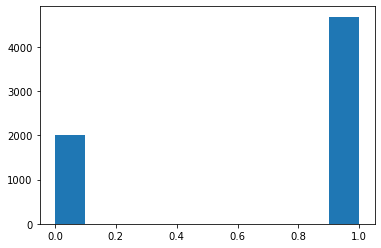

In [3]:
plt.hist(fuji.flag)
plt.show()

In [4]:
# flag_mapping = {0:"Spirals",1:"Ellipticals"}
# fuji.loc[:,"flag"] = fuji.flag.map(flag_mapping)
# fuji

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,circ_radius,pos_angle,tmass,flag,z_2,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy
0,242.603330,53.545840,39633301241072147,3447,10147,sv3,bright,39633301241072147,0.085035,0.000010,...,1.626211,70.341650,2MASXJ16102481+5332448,Ellipticals,0.0850,16.921,0.566,2.327,0.100,0.103
1,134.018314,32.468341,39632929860617550,1127,5065,sv1,bright,39632929860617550,0.075974,0.000010,...,1.706502,11.880075,2MASXJ08560439+3228059,Ellipticals,0.0760,16.298,0.658,2.229,0.239,0.056
2,185.529318,55.819114,39633332270532485,2690,11186,sv2,bright,39633332270532485,0.036741,0.000005,...,6.517449,-25.077124,2MASXJ12220705+5549084,Ellipticals,0.0367,13.780,0.766,1.085,0.082,0.142
3,171.525305,50.863969,39633259574855596,2636,5957,sv2,bright,39633259574855596,0.110230,0.000031,...,1.410348,-52.917430,2MASSJ11260609+5051502,Spirals,0.1102,16.722,0.775,1.560,-9.999,0.134
4,242.749805,55.962433,39633336208985186,3248,11524,sv3,bright,39633336208985186,0.063570,0.000049,...,2.549533,-27.487060,2MASSJ16105992+5557450,Ellipticals,0.0636,17.572,0.737,1.821,-9.999,0.169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,203.778511,2.064969,39627836465611376,742,26372,sv1,bright,39627836465611376,0.111816,0.000013,...,1.190621,-39.305637,2MASXJ13350687+0203536,Ellipticals,0.1118,16.497,0.807,1.031,0.512,0.061
6694,211.666308,-0.357299,39627782237457647,3205,26006,sv3,bright,39627782237457647,0.112972,0.000037,...,5.786677,-82.654580,2MASXJ14063992-0021263,Spirals,0.1130,16.287,0.672,2.677,0.116,0.600
6695,176.917176,54.716892,39633318353833096,2630,5980,sv2,bright,39633318353833096,0.057688,0.000014,...,1.432213,-83.668144,2MASXJ11474016+5443011,Ellipticals,0.0577,16.745,0.710,2.037,-9.999,0.051
6696,191.810582,60.846449,39633396166558573,3312,11225,sv3,bright,39633396166558573,0.131154,0.000040,...,7.571946,-46.796055,2MAXXJ12471454+6050472,Spirals,0.1314,17.473,0.615,3.056,0.279,0.282


In [5]:
print (len(fuji))

6698


In [6]:
fuji_train = fuji.head(4000)
fuji_test = fuji.tail(2698)

In [7]:
fuji.keys()

Index(['ra_1', 'dec_1', 'targetid_1', 'id', 'healpix', 'survey', 'program',
       'targetid.1', 'z_1', 'zerr', 'zwarn', 'spectype', 'subtype',
       'deltachi2', 'healpix_id', 'obsconditions', 'release', 'brickid_1',
       'brick_objid', 'sersic_1', 'coadd_numexp', 'coadd_exptime',
       'coadd_numnight', 'coadd_numtile', 'healpix_id.1', 'objid_1',
       'brickid.1', 'brickname_1', 'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR',
       'snr_ppxf', 'TYPE', 'SERSIC_2', 'Z_PHOT_MEDIAN', 'Z_PHOT_L95', 'mag_g',
       'mag_r', 'mag_z', 'mag_B', 'mag_g_err', 'mag_r_err', 'mag_z_err',
       'fibre_mag_g', 'fibre_mag_r', 'fibre_mag_z', 'uncor_radius',
       'uncor_radius_err', 'BA_ratio', 'BA_ratio_error', 'circ_radius',
       'pos_angle', 'tmass', 'flag', 'z_2', 'rmag', 'g_r_PS1_5_cor', 'W2_W3',
       'W2_W3_err', 'PS1_ibumpy'],
      dtype='object')

In [8]:
cols = ['sersic_1','mag_g','mag_r','mag_z','uncor_radius','BA_ratio','pos_angle','g_r_PS1_5_cor','W2_W3']
cols

['sersic_1',
 'mag_g',
 'mag_r',
 'mag_z',
 'uncor_radius',
 'BA_ratio',
 'pos_angle',
 'g_r_PS1_5_cor',
 'W2_W3']

In [9]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [10]:
clf.fit(fuji_train[cols],fuji_train.flag)

DecisionTreeClassifier(max_depth=5)

In [11]:
train_predictions = clf.predict(fuji_train[cols])

In [12]:
test_predictions = clf.predict(fuji_test[cols])

In [13]:
train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
train_accuracy

0.866

In [14]:
test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
test_accuracy

0.8458117123795404

In [15]:
train_accuracies = []; test_accuracies= []; depth = []
for i in range(24):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf.fit(fuji_train[cols],fuji_train.flag)
    train_predictions = clf.predict(fuji_train[cols])
    test_predictions = clf.predict(fuji_test[cols])
    train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
    test_accuracies.append(test_accuracy)
    depth.append(i+1)

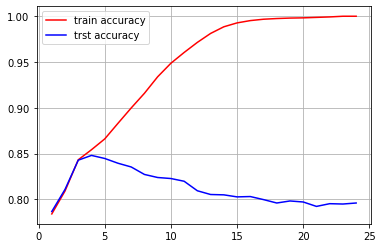

In [16]:
plt.plot(depth,train_accuracies, color="red",label="train accuracy")
plt.plot(depth,test_accuracies, color="blue",label="trst accuracy")
plt.grid()
plt.legend()
plt.show()

In [17]:
fuji_train["flag"].values

array(['Ellipticals', 'Ellipticals', 'Ellipticals', ..., 'Spirals',
       'Spirals', 'Ellipticals'], dtype=object)

In [18]:
#to do that all what you need is to uncomment cell #3 which change 0 to spirals and 1 to ellipticals
export_graphviz(
            clf,
            out_file="fuji_tree.dot",
            feature_names=cols,
            class_names=fuji_train.flag,
            rounded=True,
            filled=True
        )
sys("dot -Tpng fuji_tree.dot -o fuji_tree.png")

0

In [20]:
metrics.f1_score(fuji_test.flag, test_predictions)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1254: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['Ellipticals', 'Spirals'], dtype='<U11')